In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from combined_fit import spectrum as sp
from combined_fit import constant
from combined_fit import mass
from combined_fit import tensor as ts
from combined_fit import draw

In [5]:
#Injected masses
A	= [1,4,14,28,56]
Z	= [1,2,7,14,26]
    
hadr_model = "Sibyll" #"Sibyll" or "EPOS-LHC"
logRmin = 17.8 #Integrate the injected spectrum from logR_min to get total energy x k    
logE_th = 18.75 # Compute the deviance from logE_th
isSFR = True # True for SFRD, False for SMD
    
#Best-fit parameters, inferred with Examples/Fit.py
if isSFR:
	key = "sfrd"#solar mass / (yr.Mpc3)
	logRcut, gamma_nucl, gamma_p =  18.28, -0.36, 2.64
	E_times_k = [9.06E+45, 6.79E+45, 2.30E+46, 7.11E+45, 1.69E+45]
	unit_E_times_k = "erg per solar mass"
	sigma_shift_sys = 1.20
else:
	key = "smd"#solar mass / Mpc3, mass
	logRcut, gamma_nucl, gamma_p =  18.41, 0.62, 3.02
	E_times_k = [2.27E+36, 2.13E+35, 1.33E+36, 1.78E+35, 1.77E+35]
	unit_E_times_k = "erg per solar mass per year"
	sigma_shift_sys = 1.54

In [6]:
################################# Tensor ##################################
###########################################################################
S_z = ts.Load_evol(file = key+"_local.dat", key=key)
w_zR_nucl = sp.weight_tensor(S_z, gamma_nucl, logRcut)
w_zR_p = sp.weight_tensor(S_z, gamma_p, logRcut)
Tensor = ts.upload_Tensor(logRmin = logRmin)

Minimum energy above which flux is computed is below logRmin
Setting Emin to Rmin: 17.8


Saving plot as uhecr_spectrum_inj_sfrd.pdf
Saving plot as uhecr_spectrum_det_sfrd.pdf
Saving plot as uhecr_atmospheric_depth_sfrd.pdf


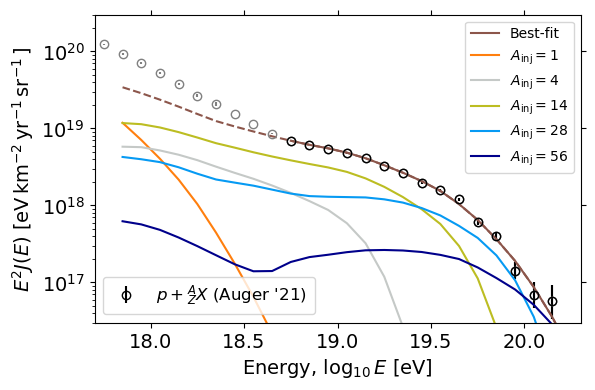

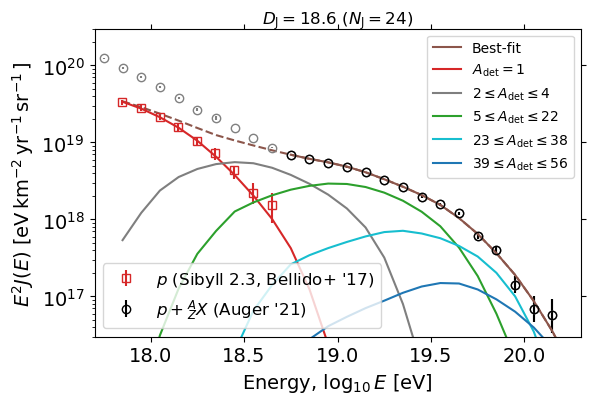

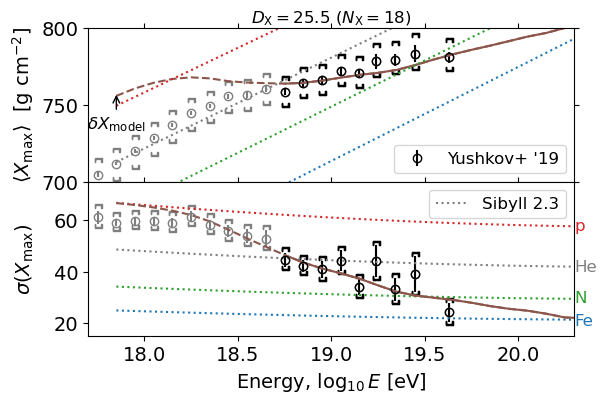

In [4]:
################################## Plot ###################################
###########################################################################

plt.rcParams.update({'font.size': 14,'legend.fontsize': 12})
    
sp.Plot_spectrum(Tensor, E_times_k, ts.A, ts.Z, w_zR_nucl, w_zR_p, logE_th, hadr_model, isE3dJdE= False, isRenormalized=False, ext_save=key)
mass.Plot_Xmax(Tensor, E_times_k, sigma_shift_sys, ts.A, ts.Z, w_zR_nucl, w_zR_p, logE_th, hadr_model, ext_save=key)

plt.show()